 Clustering Crypto

In [162]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

Deliverable 1: Preprocessing the Data for PCA

In [163]:
# Load the crypto_data.csv dataset.
# YOUR CODE HERE
crypto_df = pd.read_csv("Resources/crypto_data.csv", index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [164]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
crypto_df = crypto_df[crypto_df.loc[:, 'IsTrading'] != 0]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [165]:
# Keep all the cryptocurrencies that have a working algorithm.
# YOUR CODE HERE
crypto_df = crypto_df[crypto_df.Algorithm.isna() == False]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [166]:
# Remove the "IsTrading" column. 
# YOUR CODE HERE
crypto_df = crypto_df.drop(["IsTrading"], axis=1)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [167]:
# Remove rows that have at least 1 null value.
# YOUR CODE HERE
crypto_df = crypto_df.dropna(how='any',axis=0)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [168]:
# Keep the rows where coins are mined.
# YOUR CODE HERE
crypto_df = crypto_df[crypto_df.TotalCoinsMined > 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [169]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# YOUR CODE HERE
df = crypto_df.filter(['CoinName'], axis=1)
df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [170]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
# YOUR CODE HERE
crypto_df = crypto_df.drop(["CoinName"], axis=1)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [171]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])



Deliverable 2: Reducing Data Dimensions Using PCA

In [173]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
X_pca = PCA(n_components=3).fit_transform(X_scaled)
X_pca

array([[-0.33622812,  1.01724032, -0.44232123],
       [-0.31956086,  1.01737716, -0.44245634],
       [ 2.31070772,  1.66367387, -0.48305187],
       ...,
       [ 0.31170368, -2.26798582,  0.34509007],
       [-0.11410914, -2.00822365,  0.27644078],
       [-0.3014163 ,  0.89257096, -0.21265966]])

In [174]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
pcs_df = pd.DataFrame(X_pca, columns=["principal component 1", "principal component 2", "principal component 3"], index=crypto_df.index)
pcs_df

,principal component 1,principal component 2,principal component 3
42,-0.336228,1.017240,-0.442321
404,-0.319561,1.017377,-0.442456
1337,2.310708,1.663674,-0.483052
BTC,-0.133814,-1.286613,0.113616
ETH,-0.156540,-2.050277,0.281393
...,...,...,...
ZEPH,2.484192,0.839015,0.003556
GAP,-0.334275,1.017131,-0.442321
BDX,0.311704,-2.267986,0.345090
ZEN,-0.114109,-2.008224,0.276441




Deliverable 3: Clustering Crytocurrencies Using K-Means
Finding the Best Value for k Using the Elbow Curve

{1: 3637.3227436973243, 2: 2470.935834772364, 3: 1502.8464858842528, 4: 594.2502637254914, 5: 405.71629075789673, 6: 306.1960587126893, 7: 245.50289331524053, 8: 188.0613996546062, 9: 140.49683797877404, 10: 105.20487713650392}


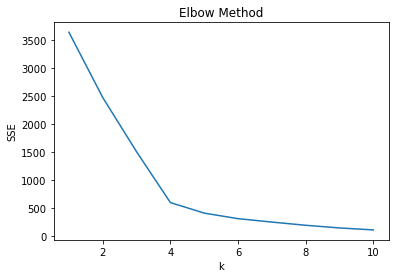

In [175]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
sse = {}
K = range(1,11)
for i in K:
    kmmodel = KMeans(n_clusters=i, random_state=42).fit(X_pca)
    sse[i] = kmmodel.inertia_
print(sse)
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [176]:
# Initialize the K-Means model.
# YOUR CODE HERE
model = KMeans(n_clusters=4, random_state=42)
# Fit the model
# YOUR CODE HERE
model.fit(X_pca)
# Predict clusters
# YOUR CODE HERE
y_pred = model.predict(X_pca)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [177]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# YOUR CODE HERE
crypto_df["cluster"] = y_pred
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, join='inner')

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE
clustered_df["CoinName"] = df.CoinName
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE
clustered_df["Class"] = model.labels_
# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 10)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,cluster,principal component 1,principal component 2,principal component 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,1,-0.336228,1.017240,-0.442321,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,1,-0.319561,1.017377,-0.442456,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,1,2.310708,1.663674,-0.483052,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,0,-0.133814,-1.286613,0.113616,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,0,-0.156540,-2.050277,0.281393,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,0,-0.171056,-1.083304,-0.025935,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,1,-0.390490,1.069329,-0.350366,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,0,-0.151581,-2.238899,0.270829,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,0,-0.154984,-2.050372,0.281394,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,0,-0.114108,-2.008224,0.276441,ZCash,0


Deliverable 4: Visualizing Cryptocurrencies Results
3D-Scatter with Clusters

In [178]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE
fig = px.scatter_3d(clustered_df, x="principal component 1", y="principal component 2", z="principal component 3", color="Class", symbol="Class", width=800, 
                    hover_name="CoinName", hover_data=["Algorithm"])
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [179]:
# Create a table with tradable cryptocurrencies.
# YOUR CODE HERE
table = clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True, selectable=True)
table

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [180]:
# Print the total number of tradable cryptocurrencies.
# YOUR CODE HERE
print(f'The total number of tradable cryptocurrencies is {len(clustered_df)}')

The total number of tradable cryptocurrencies is 532


In [181]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE
X_df = clustered_df[['TotalCoinSupply', 'TotalCoinsMined']].copy()
X_scaled = MinMaxScaler().fit_transform(X_df)
X_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [182]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE
plot_df = pd.DataFrame(X_scaled, columns=['TotalCoinSupply', 'TotalCoinsMined'], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE
plot_df["CoinName"] = df.CoinName
# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE
plot_df['Class'] = clustered_df.Class
plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


In [183]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
plot_df.hvplot.scatter(x='TotalCoinsMined', y='TotalCoinSupply', by='Class')

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)